In [1]:
import numpy as np
np.random.seed( 42 )
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

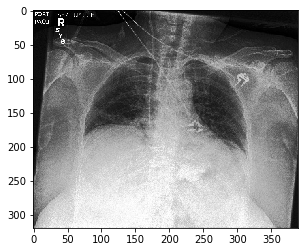

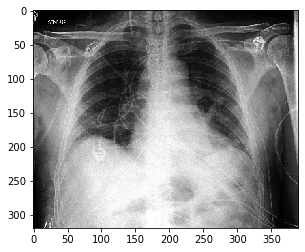

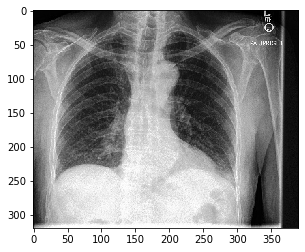

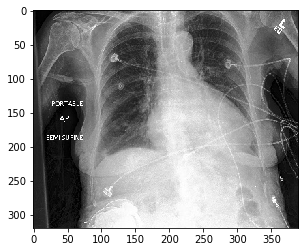

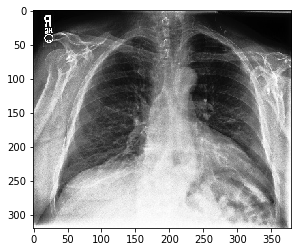

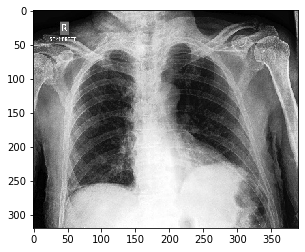

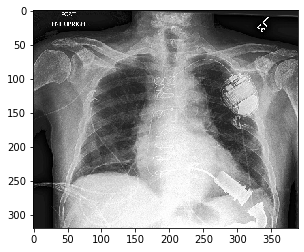

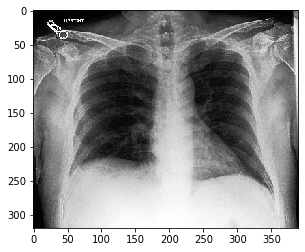

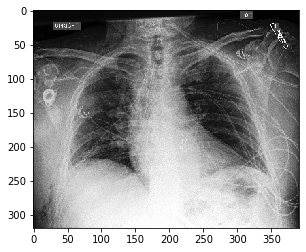

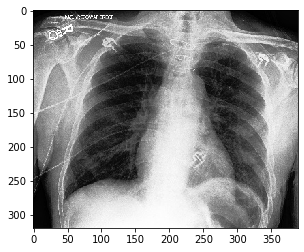


 ############################################# 



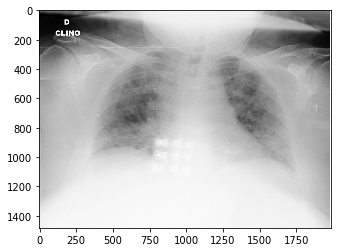

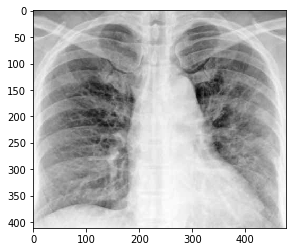

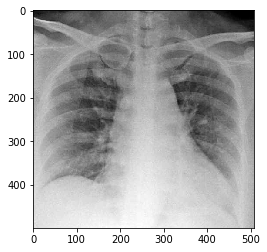

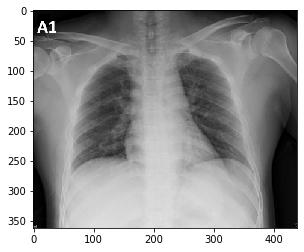

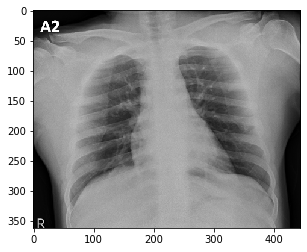

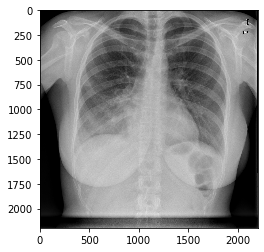

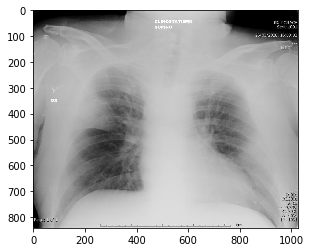

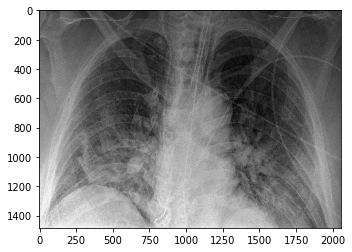

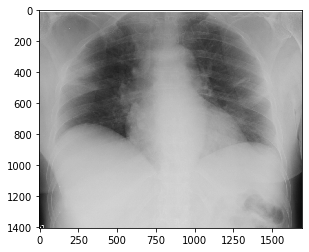

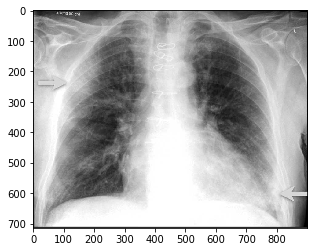


 ############################################# 



In [2]:
train_path  =r"D:\Project Data_sets\covid_update\Train"
CATEGORIES = ["non_covid","covid" ]
for category in CATEGORIES:  # do covid & non_covid
    path = os.path.join(train_path ,category)  # create path to non_covid & covid
    x=0
    for img in os.listdir(path):  # iterate over each image per non_covid & covid
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')# graph it
        plt.show()  # display!
        if x==10 :
            print("\n ############################################# \n")
            break
                  

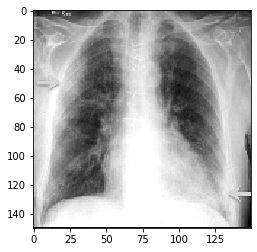

[[ 0 22 61 ...  0  0 24]
 [ 2 26 66 ...  1  0 24]
 [ 5 31 73 ...  4  0 24]
 ...
 [22  0 20 ... 16 14 37]
 [42 42 42 ... 42 42 42]
 [42 42 42 ... 42 42 42]]


In [3]:
#test size
IMG_SIZE = 150
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()
print(img_array)

In [4]:
all_data = []

def create_training_data():
    for category in CATEGORIES:  # do non_covid & covid

        path = os.path.join(train_path,category)  # create path to non_covid & covid
        class_num = CATEGORIES.index(category)  # get the classification  (0 or  1). 0=non_covid 1=covid

        for img in tqdm(os.listdir(path)):  # iterate over each image per non_covid & covid
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                all_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_training_data()

print(len(all_data))

100%|██████████| 250/250 [00:09<00:00, 25.70it/s]


453


In [5]:
test_path = r"D:\Project Data_sets\covid_update\Test"
def create_test_data():
    for category in CATEGORIES:  # do non_covid & covid

        path = os.path.join(test_path,category)  # create path to non_covid & covid
        class_num = CATEGORIES.index(category)  # get the classification  (0 or  1). 0=non_covid 1=covid

        for img in tqdm(os.listdir(path)):  # iterate over each image per non_covid & covid
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))# resize to normalize data size
                all_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_test_data()

print(len(all_data))

100%|██████████| 100/100 [00:06<00:00, 15.95it/s]


672


In [6]:
import random
random.shuffle(all_data)
for sample in all_data[:10]:
    print(sample[1])

1
0
1
0
0
1
1
0
1
1


[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 6 6 6]
 [1 1 1 ... 2 2 2]
 [1 1 1 ... 1 1 1]]
[[  1   1   1 ...   1   1   1]
 [  5   3   3 ... 162 169 144]
 [  0   0   0 ...   0   0   0]
 ...
 [ 53  53  53 ...  53  53  53]
 [  0   4   1 ...   4   0   1]
 [  4   5   5 ...   1   1   1]]


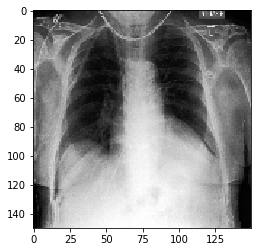

In [7]:
x = []
y = []

for features,label in all_data:
    x.append(features)
    y.append(label)
#print(x[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
print(x[0])
plt.imshow(x[10],cmap='gray')
plt.show
# nsamples, nx, ny = x.shape
# d2_train_dataset = x.reshape((nsamples,nx*ny))
x = np.array(x).reshape(-1, IMG_SIZE*IMG_SIZE)
y = np.array(y)

print(x)


In [12]:
from sklearn import preprocessing
quantile_transformer = preprocessing.QuantileTransformer(random_state=0,n_quantiles =672)
X_train_trans = quantile_transformer.fit_transform(x)
print(X_train_trans)

[[0.21758569 0.22652757 0.22876304 ... 0.14456036 0.14530551 0.14307004]
 [0.37257824 0.32563338 0.33755589 ... 0.80402385 0.83084948 0.7876304 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.70566319 0.72280179 0.72727273 ... 0.5514158  0.57377049 0.56259314]
 [0.         0.35916542 0.22876304 ... 0.21087928 0.         0.14307004]
 [0.34724292 0.39120715 0.40461997 ... 0.14456036 0.14530551 0.14307004]]


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train_trans,y, test_size=0.15)
print(len(x_train))
print(len(x_test))


571
101


In [31]:
# model = KNeighborsClassifier()
# model.fit(x_train, y_train)
# acc = model.score(x_test, y_test)
# acc_train=model.score(x_train, y_train)
# print("{:.2f}%".format(acc_train*100))

# print("[INFO] raw pixel accuracy: {:.2f}%".format(acc * 100))

from sklearn.model_selection import cross_val_score
import time

k_fold =10
tic=time.time()
model=KNeighborsClassifier()
k_score=cross_val_score(model, x_train, y_train,cv=k_fold)
toc=time.time()
print(k_score)
print(toc-tic)



[0.89655172 0.94827586 0.96551724 0.89655172 0.98275862 0.92982456
 0.98214286 0.94642857 0.94642857 0.94642857]
20.438272714614868


In [32]:
s=0
for k in k_score:
    s+=k
print("average of accuracy= ",(s/k_fold)*100,"%")

average of accuracy=  94.40908305245873 %


In [26]:
k_score

array([0.89655172, 0.94827586, 0.96551724, 0.89655172, 0.98275862,
       0.92982456, 0.98214286, 0.94642857, 0.94642857, 0.94642857])

[[10 10 10 ...  9  6  2]]
*****************
*****************
[[10 10 10 ...  8  7  6]
 [10 10 10 ...  8  7  6]
 [55 55 55 ...  8  7  6]
 ...
 [ 6  5  5 ... 20  9  1]
 [ 6  6  6 ... 14  6  1]
 [ 5  7  7 ...  9  6  2]]


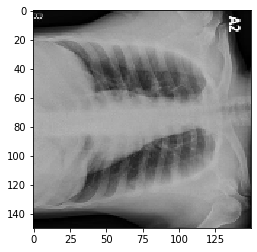

In [123]:
img = cv2.imread(r"D:\python\M.L_2\0.jpeg",cv2.IMREAD_GRAYSCALE)

new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

x = np.array(new_img).reshape(-1, IMG_SIZE*IMG_SIZE)


print(x)
print("*****************\n*****************")
print(new_img)
plt.imshow(new_img, cmap='gray')
plt.show()

In [124]:
prediction = model.predict([x][0])
prediction_text = "covid" if prediction == 1 else "non_covid"
print(prediction_text)

covid
